<a href="https://colab.research.google.com/github/idnunez/MAT-421/blob/main/MAT421FinalPaper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Interpolation and Regression Methods for Global Temperature Data

Isaac Nunez

This paper will compare methods for creating models for global temperature data. The goal is to find the more accurate method for approximating the data. The two methods that will be used are cubic spline interpolation and polynomial regression. Both of these methods are used in data science as ways to model large amounts of data, but have noteably different applications.

The dataset that will be used is the Global Temperature Time Series from datahub.io. The different methods used with be compared with each other under different sample sizes to gauge which is better under these differing cases.

>Cubic Spline Interpolation

The goal of interpolation is to find a function for a given data set that passes through each available data point, while still accurately predicting missing data points. In general, interpolation is used with data sets that are assumed to be continuous, since the resulting function will always pass through every point.

The most basic form of interpolation is linear interpolation. This method constructs the function using straight lines between each data point, resulting in a piecewise-linear function. While this method can allow us to see general trends in a dataset, it has some flaws. Linear interpolation, while being continuous, does not result in a continuous first derivative.

Cubic spline interpolation allows us to find a more accurate approximation of a dataset by creating a set of cubic functions as opposed to linear functions. This allows us to have a continuous first and second derivative, making the function to be easier to work with.

>Polynomial Regression

Regression is the other major method for approximating function for datasets. Unlike interpolation, regression assumes some amount of error will be present in the data.

Regression works by fitting a single function onto a dataset while minimizing the error. This is done using linear algebra to find a number of coefficients for the final function, while minimizing the total error.

One advantage regression has over interpolation is that it works well with datasets that contains outliers or other forms of variation. It is mostly used to model trends between variables.

For this particular dataset, I predict that interpolation will be more accurate that regression. This is because, by it's nature, globle temperature is continuous. There will always be exactly one temperature value at any given time, meaning that there could theoretically be a function containing every temperature value with no error, meaning regression will be less accurate overall.

Before we begin testing these methods, we must begin by placing our data into useable arrays for python.

In [76]:
import csv
import os

#Access both datasets
current_directory = os.getcwd()

file_path_a = os.path.join(current_directory, "annual.csv")

#Initialize arrays for both datasets
annual = list(csv.reader(open(file_path_a)))

#remove initial values, as they are strings
annual.pop(0)

#Separate the two different data sets, gcag and GISTEMP into two separate lists
annual_gcag = [x for x in annual if "GISTEMP" not in x]
annual_GISTEMP = [x for x in annual if "gcag" not in x]

#convert strings in data set into useable floats
annual_temps_gcag = [float(x[2]) for x in annual_gcag]
annual_temps_GISTEMP = [float(x[2]) for x in annual_GISTEMP]


Now that the data is in a easier to use form, we can use the scipy CubicSpline function as well as the numpy polyfit function in order to model the yearly temperatures.

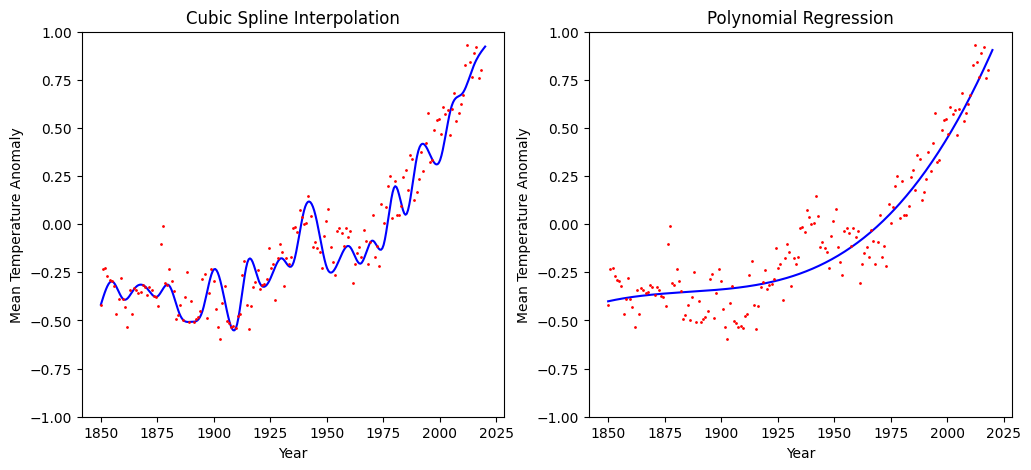

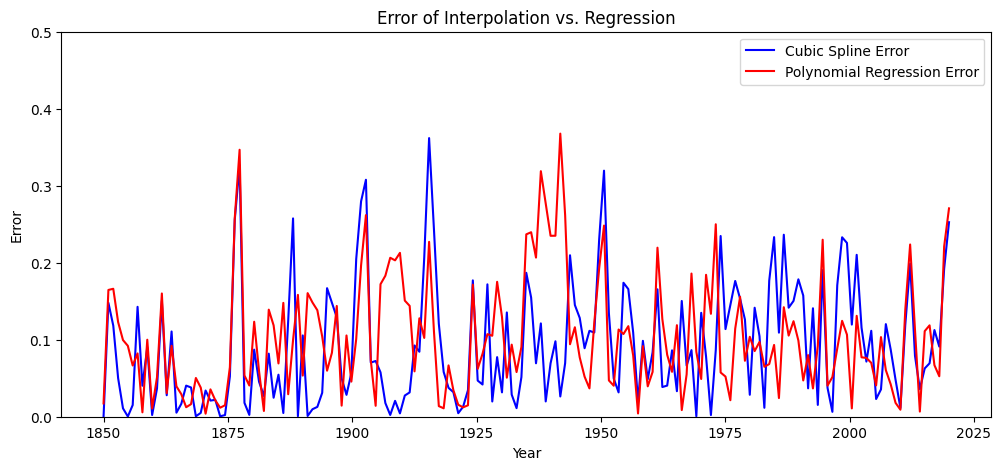

Mean Interpolation Error:  0.0931184799794566
Mean Regression Error:  0.10318574448096042


In [77]:
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
import numpy as np

#Creating a smaller list in order to test how accurate the models are
x = np.linspace(1850, 2020, 35)
y = annual_temps_gcag[::5]

f = CubicSpline(x,y, bc_type = 'natural')
x_approx = np.linspace(1850,2020,300)
y_approx_spline = f(x_approx)

x_exact = np.linspace(1850,2020,175)

plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.plot(x_approx, y_approx_spline, 'b-')
plt.plot(x_exact, annual_temps_gcag, 'ro', markersize=1)
plt.xlabel('Year')
plt.ylabel('Mean Temperature Anomaly')
plt.ylim(-1,1)
plt.title('Cubic Spline Interpolation')

y_approx_poly = np.polyfit(x,y,3)

x_exact = np.linspace(1850,2020,175)

plt.subplot(1,2,2)
plt.plot(x_approx, np.polyval(y_approx_poly, x_approx), 'b-')
plt.plot(x_exact, annual_temps_gcag, 'ro', markersize=1)
plt.xlabel('Year')
plt.ylabel('Mean Temperature Anomaly')
plt.ylim(-1,1)
plt.title('Polynomial Regression')
plt.show()

spline_error = np.abs(f(x_exact) - annual_temps_gcag)
poly_error = np.abs(np.polyval(y_approx_poly, x_exact) - annual_temps_gcag)

plt.figure(figsize = (12,5))
plt.plot(x_exact, spline_error, 'b-', label = 'Cubic Spline Error')
plt.plot(x_exact, poly_error, 'r-', label = 'Polynomial Regression Error')
plt.xlabel('Year')
plt.ylabel('Error')
plt.ylim(0,0.5)
plt.title('Error of Interpolation vs. Regression')
plt.legend()
plt.show()


print("Mean Interpolation Error: ", np.mean(spline_error))
print("Mean Regression Error: ", np.mean(poly_error))

When observing the two graphs, it appears that interpolation captured more of the variations over smaller periods of time, while regression described a more broad trend of the data. In order for regression to have the same precision as interpolation, it would need to be of a higher order, which would take more computation power. Overall, the average error was very similar between the two methods, with interpolation just barely beating out regression. We will perform the same approximations using the GISTEMP dataset instead.

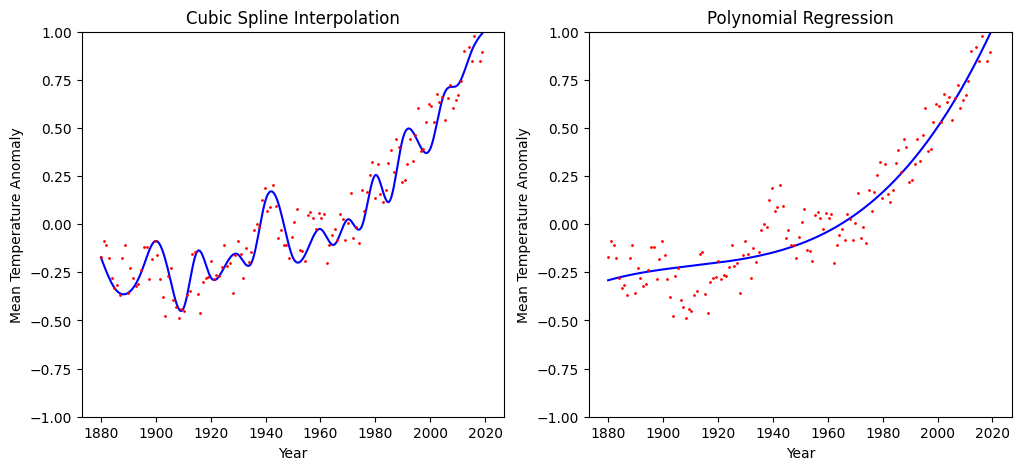

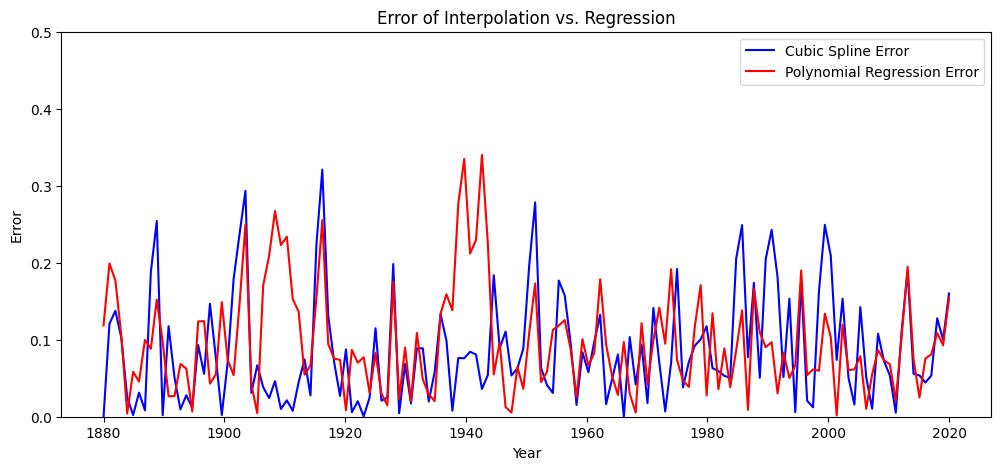

Mean Interpolation Error:  0.08682048333124853
Mean Regression Error:  0.09676935921879397


In [78]:
x = np.linspace(1880, 2020, 29)
y = annual_temps_GISTEMP[::5]

f = CubicSpline(x,y, bc_type = 'natural')
x_approx = np.linspace(1880,2020,300)
y_approx_spline = f(x_approx)

x_exact = np.linspace(1880,2020,144)

plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.plot(x_approx, y_approx_spline, 'b-')
plt.plot(x_exact, annual_temps_GISTEMP, 'ro', markersize=1)
plt.xlabel('Year')
plt.ylabel('Mean Temperature Anomaly')
plt.ylim(-1,1)
plt.title('Cubic Spline Interpolation')

y_approx_poly = np.polyfit(x,y,3)

plt.subplot(1,2,2)
plt.plot(x_approx, np.polyval(y_approx_poly, x_approx), 'b-')
plt.plot(x_exact, annual_temps_GISTEMP, 'ro', markersize=1)
plt.xlabel('Year')
plt.ylabel('Mean Temperature Anomaly')
plt.ylim(-1,1)
plt.title('Polynomial Regression')
plt.show()

spline_error = np.abs(f(x_exact) - annual_temps_GISTEMP)
poly_error = np.abs(np.polyval(y_approx_poly, x_exact) - annual_temps_GISTEMP)

plt.figure(figsize = (12,5))
plt.plot(x_exact, spline_error, 'b-', label = 'Cubic Spline Error')
plt.plot(x_exact, poly_error, 'r-', label = 'Polynomial Regression Error')
plt.xlabel('Year')
plt.ylabel('Error')
plt.ylim(0,0.5)
plt.title('Error of Interpolation vs. Regression')
plt.legend()
plt.show()


print("Mean Interpolation Error: ", np.mean(spline_error))
print("Mean Regression Error: ", np.mean(poly_error))

This case yielded very similar results, with interpolation having a slightly smaller error than regression. Now, we will test the same dataset with fewer given datapoints to see how this affects the results.

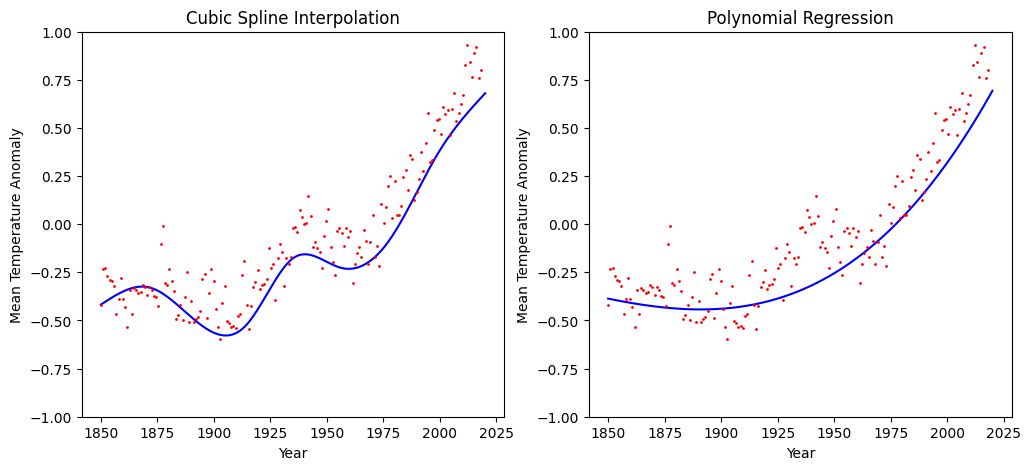

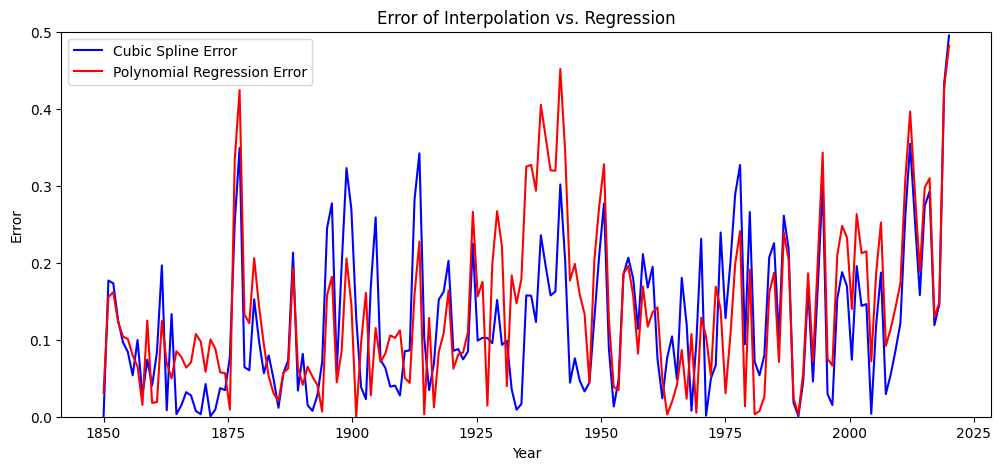

Mean Interpolation Error:  0.12331058774389146
Mean Regression Error:  0.13900445598194147


In [79]:
#Creating a smaller list in order to test how accurate the models are
x = np.linspace(1850, 2020, 9)
y = annual_temps_gcag[::20]

f = CubicSpline(x,y, bc_type = 'natural')
x_approx = np.linspace(1850,2020,300)
y_approx_spline = f(x_approx)

x_exact = np.linspace(1850,2020,175)

plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.plot(x_approx, y_approx_spline, 'b-')
plt.plot(x_exact, annual_temps_gcag, 'ro', markersize=1)
plt.xlabel('Year')
plt.ylabel('Mean Temperature Anomaly')
plt.ylim(-1,1)
plt.title('Cubic Spline Interpolation')

y_approx_poly = np.polyfit(x,y,3)

x_exact = np.linspace(1850,2020,175)

plt.subplot(1,2,2)
plt.plot(x_approx, np.polyval(y_approx_poly, x_approx), 'b-')
plt.plot(x_exact, annual_temps_gcag, 'ro', markersize=1)
plt.xlabel('Year')
plt.ylabel('Mean Temperature Anomaly')
plt.ylim(-1,1)
plt.title('Polynomial Regression')
plt.show()

spline_error = np.abs(f(x_exact) - annual_temps_gcag)
poly_error = np.abs(np.polyval(y_approx_poly, x_exact) - annual_temps_gcag)

plt.figure(figsize = (12,5))
plt.plot(x_exact, spline_error, 'b-', label = 'Cubic Spline Error')
plt.plot(x_exact, poly_error, 'r-', label = 'Polynomial Regression Error')
plt.xlabel('Year')
plt.ylabel('Error')
plt.ylim(0,0.5)
plt.title('Error of Interpolation vs. Regression')
plt.legend()
plt.show()


print("Mean Interpolation Error: ", np.mean(spline_error))
print("Mean Regression Error: ", np.mean(poly_error))

Even with the lower number of points, interpolation was still slightly more accurate than polynomial regression in terms of minimizing error.

From these experiments, as predicted, we find that interpolation is more accurate for predicting temperature data than regression, likely due to the fact that temperature is continuous at any point and can thus be modeled accurately with interpolation.

Sources Used:

Regression and Interpolation information and research:

https://www.andreaminini.net/math/difference-between-interpolation-and-regression

https://www.baeldung.com/cs/interpolation-vs-regression

Dataset Used:

https://datahub.io/core/global-temp#readme